### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
print('Informacion cargada')

Informacion cargada


In [2]:
print(tienda.head())
print('----------------------------------------------')
print(tienda.columns)

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito   

#1. Análisis de facturación



In [3]:
total_precio_tienda = tienda['Precio'].sum()
total_precio_tienda2 = tienda2['Precio'].sum()
total_precio_tienda3 = tienda3['Precio'].sum()
total_precio_tienda4 = tienda4['Precio'].sum()

print(f'total_precio_tienda:{round(total_precio_tienda)} pesos')
print(f'total_precio_tienda2:{round(total_precio_tienda2,2)} pesos')
print(f'total_precio_tienda3:{round(total_precio_tienda3,2)} pesos')
print(f'total_precio_tienda4:{round(total_precio_tienda4,2)} pesos')

total_precio_tienda:1150880400 pesos
total_precio_tienda2:1116343500.0 pesos
total_precio_tienda3:1098019600.0 pesos
total_precio_tienda4:1038375700.0 pesos


In [4]:
totales_facturacion = pd.DataFrame({
   'tiendas':['tienda','tienda2', 'tienda3', 'tienda4'],
   'total_facturacion':[
       total_precio_tienda,
       total_precio_tienda2,
       total_precio_tienda3,
       total_precio_tienda4
   ]
})

print(totales_facturacion)

   tiendas  total_facturacion
0   tienda       1.150880e+09
1  tienda2       1.116344e+09
2  tienda3       1.098020e+09
3  tienda4       1.038376e+09


In [5]:
pd.set_option('display.float_format' , '{:.2f}'.format)
totales_facturacion = totales_facturacion.sort_values(by='tiendas', ascending=False)
print(totales_facturacion)

   tiendas  total_facturacion
3  tienda4      1038375700.00
2  tienda3      1098019600.00
1  tienda2      1116343500.00
0   tienda      1150880400.00


# 2. Ventas por categoría

In [6]:
datos_combinados= pd.concat([tienda,tienda2,tienda3,tienda4], ignore_index=True)
print('Información cargada con éxito!!')

Información cargada con éxito!!


In [7]:
categorias_mas_vendidas = datos_combinados.groupby('Categoría del Producto')['Precio'].sum().reset_index()
categorias_mas_vendidas = categorias_mas_vendidas.rename(columns= {'Precio': 'Cantidad'})
categorias_mas_vendidas = categorias_mas_vendidas.sort_values(by='Cantidad', ascending=False)
print(categorias_mas_vendidas)

    Categoría del Producto      Cantidad
3             Electrónicos 1660576500.00
2        Electrodomésticos 1324751100.00
7                  Muebles  757661000.00
4   Instrumentos musicales  348772600.00
1     Deportes y diversión  142977700.00
5                 Juguetes   73604400.00
0  Artículos para el hogar   57579800.00
6                   Libros   37696100.00


# 3. Calificación promedio de la tienda


In [8]:
datos_combinados = datos_combinados.dropna(subset=['Calificación'])
promedio_evaluacion= datos_combinados['Calificación'].mean()
print(f'La calificación promedio de las tiendas en escala de 1-5 es de {promedio_evaluacion:.2f}%')

La calificación promedio de las tiendas en escala de 1-5 es de 4.01%


# 4. Productos más y menos vendidos

In [9]:
# Productos mas vendidos
productos_mas_vendidos = datos_combinados.groupby('Producto')['Precio'].sum().reset_index()
productos_mas_vendidos = productos_mas_vendidos.rename(columns= {'Precio': 'Cantidad'})
productos_mas_vendidos = productos_mas_vendidos.sort_values(by='Producto', ascending=False)
print(productos_mas_vendidos)

                       Producto     Cantidad
50                 Vaso térmico   8497400.00
49                  Tablet ABXY 219012800.00
48                TV LED UHD 4K 432489600.00
47              Sofá reclinable 123279100.00
46                   Smartwatch  29929800.00
45                     Smart TV 290221800.00
44                       Sillón  40796800.00
43             Silla de oficina  69099000.00
42                 Set de vasos   5584200.00
41                 Set de ollas  30506400.00
40             Secadora de ropa 210238000.00
39                 Refrigerador 384937400.00
38                    Pandereta  12663400.00
37              Olla de presión  12928800.00
36                  Muñeca bebé   8591500.00
35          Modelado predictivo  12616100.00
34                      Mochila  16065700.00
33                   Microondas 115699500.00
32                Mesa de noche  58419500.00
31              Mesa de comedor  46815700.00
30               Mesa de centro  29842000.00
29        

In [10]:
top_5_productos = productos_mas_vendidos.head(5)
print(top_5_productos)

           Producto     Cantidad
50     Vaso térmico   8497400.00
49      Tablet ABXY 219012800.00
48    TV LED UHD 4K 432489600.00
47  Sofá reclinable 123279100.00
46       Smartwatch  29929800.00


In [18]:
#Productos menos vendidos
datos_combinados1 = pd.concat([tienda,tienda2,tienda3,tienda4],ignore_index=True)
productos_menos_vendidos = datos_combinados1.groupby('Producto')['Precio'].sum(). reset_index()
productos_menos_vendidos = productos_menos_vendidos.sort_values(by='Precio', ascending=True)
productos_menos_vendidos = productos_menos_vendidos.iloc[0]
print (f"Producto menos vendido: {productos_menos_vendidos['Producto']}")

Producto menos vendido: Cubo mágico 8x8


# 5. Envío promedio por tienda

In [12]:
datos_combinados = datos_combinados.dropna(subset=['Costo de envío'])
promedio_costo_envio = datos_combinados['Costo de envío'].mean()
print(f'El costo de envío es {promedio_costo_envio:.2f} colones')

El costo de envío es 24875.15 colones


# Análisis de reporte

En este reporte nos pidieron el análisis de facturación, ventas por catégoria, los productos más y menos vendidos, el envío promedio de las tiendas entre otras.

El propósito de este análisis es ayudar al Sr Juan a decidir que tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento.
Con este análisis se descubrió que

A. La tienda que menos produce es la tienda 4 con 1038375700.00

B. La tienda que más produce es la tienda 1 con 1150880400.00

#GRÁFICOS

In [13]:
print (totales_facturacion)

   tiendas  total_facturacion
3  tienda4      1038375700.00
2  tienda3      1098019600.00
1  tienda2      1116343500.00
0   tienda      1150880400.00


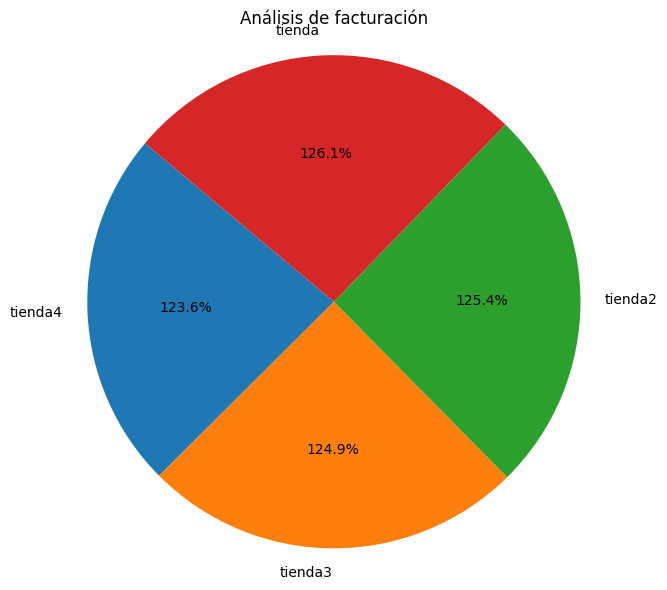

In [15]:
import matplotlib.pyplot as plt
tiendas =['tienda4', 'tienda3', 'tienda2', 'tienda']
totales_facturacion = [ 1038375700.00, 1098019600.00, 1116343500.00, 1150880400.00]

plt.figure(figsize=(7, 7))
plt.pie(totales_facturacion, labels=tiendas, autopct='1%.1f%%', startangle=140)
plt.title('Análisis de facturación')
plt.axis('equal')
plt.show()

In [23]:
print(categorias_mas_vendidas)

    Categoría del Producto      Cantidad
3             Electrónicos 1660576500.00
2        Electrodomésticos 1324751100.00
7                  Muebles  757661000.00
4   Instrumentos musicales  348772600.00
1     Deportes y diversión  142977700.00
5                 Juguetes   73604400.00
0  Artículos para el hogar   57579800.00
6                   Libros   37696100.00


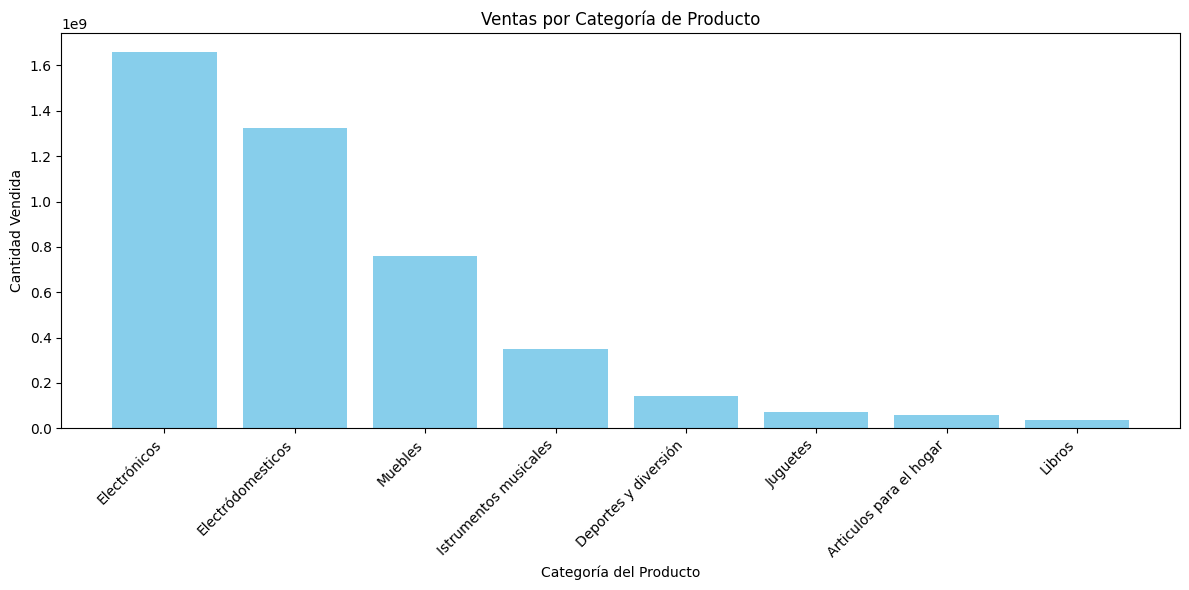

In [24]:
categorias = ['Electrónicos','Electródomesticos','Muebles','Istrumentos musicales','Deportes y diversión','Juguetes','Articulos para el hogar','Libros']
cantidad = [1660576500.00,1324751100.00,757661000.00,348772600.00,142977700.00,73604400.00,57579800.00,37696100.00]

plt.figure(figsize=(12, 6))
plt.bar(categorias, cantidad, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Ventas por Categoría de Producto')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.tight_layout()
plt.show()

In [25]:
print(top_5_productos)

           Producto     Cantidad
50     Vaso térmico   8497400.00
49      Tablet ABXY 219012800.00
48    TV LED UHD 4K 432489600.00
47  Sofá reclinable 123279100.00
46       Smartwatch  29929800.00


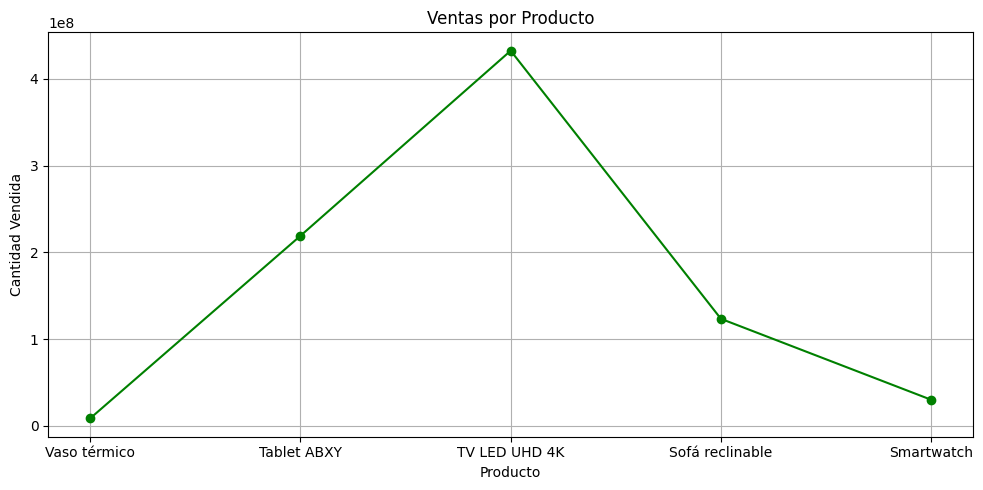

In [26]:
productos = ['Vaso térmico', 'Tablet ABXY', 'TV LED UHD 4K', 'Sofá reclinable', 'Smartwatch']
cantidades = [8497400.00, 219012800.00, 432489600.00, 123279100.00, 29929800.00]

plt.figure(figsize=(10, 5))
plt.plot(productos, cantidades, marker='o', linestyle='-', color='green')
plt.title('Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
